In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from collections import defaultdict
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import nltk
nltk.download('wordnet')
nltk.download('tagsets')
nltk.download('averaged_perceptron_tagger')

from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import string
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, ConfusionMatrixDisplay

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,\
HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shelleywang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/shelleywang/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/shelleywang/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [64]:
tokenizer = RegexpTokenizer(r"(?u)\w{3,}")
stopwords = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def preprocessing(text, tokenizer, stopwords, lemmatizer):
    # Lower case
    text = text.lower()
    
    # Tokenize
    tokens = tokenizer.tokenize(text)
    
    # Remove stopwords
    tokens =  [token for token in tokens if token not in stopwords]
    
    # Lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return tokens

In [74]:
df = pd.read_csv('../data/final_df.csv')
df["Target"] = df["Target"].astype('int')

df

,Year,Name,Text,Target,text_lower,list_tokens,string_tokens,link
0,2016,H_CLINTON,"Thank you very much, Chris. And thanks to UNL...",0,"thank you very much, chris. and thanks to unl...","['thank', 'much', 'chris', 'thanks', 'unlv', '...",thank much chris thanks unlv hosting know thin...,NaN
1,2016,H_CLINTON,"Well, thank you. Are you a teacher? Yes, I th...",0,"well, thank you. are you a teacher? yes, i th...","['well', 'thank', 'teacher', 'yes', 'think', '...",well thank teacher yes think good question hea...,NaN
2,2016,H_CLINTON,"How are you, Donald? [applause] Well, thank ...",0,"how are you, donald? [applause] well, thank ...","['donald', 'applause', 'well', 'thank', 'leste...",donald applause well thank lester thanks hofst...,NaN
3,1996,B_CLINTON,"I was going to applaud, too. Well, thank you,...",0,"i was going to applaud, too. well, thank you,...","['going', 'applaud', 'well', 'thank', 'jim', '...",going applaud well thank jim thanks people san...,NaN
4,1996,B_CLINTON,"Thank you, Jim. And thank you to the people o...",0,"thank you, jim. and thank you to the people o...","['thank', 'jim', 'thank', 'people', 'hartford'...",thank jim thank people hartford host want begi...,NaN
...,...,...,...,...,...,...,...,...
114,2005,BUSH_2,"Vice President Cheney, Mr. Chief Justice, Pres...",1,"vice president cheney, mr. chief justice, pres...","['vice', 'president', 'cheney', 'chief', 'just...",NaN,https://www.presidency.ucsb.edu/documents/inau...
115,2009,OBAMA,"My fellow citizens, I stand here today humbled...",0,"my fellow citizens, i stand here today humbled...","['fellow', 'citizen', 'stand', 'today', 'humbl...",NaN,https://www.presidency.ucsb.edu/documents/inau...
116,2013,OBAMA,Thank you. Thank you so much. Vice President B...,0,thank you. thank you so much. vice president b...,"['thank', 'thank', 'much', 'vice', 'president'...",NaN,https://www.presidency.ucsb.edu/documents/inau...
117,2017,TRUMP,"Chief Justice Roberts, President Carter, Presi...",1,"chief justice roberts, president carter, presi...","['chief', 'justice', 'robert', 'president', 'c...",NaN,https://www.presidency.ucsb.edu/documents/inau...


In [66]:
df['Text'] = df['Text'].astype(str)
tokenized_df = df['Text'].apply((lambda x: preprocessing(x, tokenizer, stopwords, lemmatizer)))
df['tokens'] = tokenized_df
df

,Year,Name,Text,Target,tokens
0,2016,H_CLINTON,"Thank you very much, Chris. And thanks to UNL...",0,"[thank, much, chris, thanks, unlv, hosting, kn..."
1,2016,H_CLINTON,"Well, thank you. Are you a teacher? Yes, I th...",0,"[well, thank, teacher, yes, think, good, quest..."
2,2016,H_CLINTON,"How are you, Donald? [applause] Well, thank ...",0,"[donald, applause, well, thank, lester, thanks..."
3,1996,B_CLINTON,"I was going to applaud, too. Well, thank you,...",0,"[going, applaud, well, thank, jim, thanks, peo..."
4,1996,B_CLINTON,"Thank you, Jim. And thank you to the people o...",0,"[thank, jim, thank, people, hartford, host, wa..."
...,...,...,...,...,...
114,2005,BUSH_2,"Vice President Cheney, Mr. Chief Justice, Pres...",1,"[vice, president, cheney, chief, justice, pres..."
115,2009,OBAMA,"My fellow citizens, I stand here today humbled...",0,"[fellow, citizen, stand, today, humbled, task,..."
116,2013,OBAMA,Thank you. Thank you so much. Vice President B...,0,"[thank, thank, much, vice, president, biden, c..."
117,2017,TRUMP,"Chief Justice Roberts, President Carter, Presi...",1,"[chief, justice, robert, president, carter, pr..."


In [67]:
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfTransformer

# X = df[["tokens"]]
# y = df["Target"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# # make into sparse matrices
# vectorizer = CountVectorizer()
# X_train = vectorizer.fit_transform(X_train["tokens"].apply(lambda x: " ".join(x)))
# X_test = vectorizer.transform(X_test["tokens"].apply(lambda x: " ".join(x)))

# tfidf = TfidfVectorizer()
# X_train_tfidf = tfidf_transformer.fit_transform(X_train)
# X_test_tfidf = tfidf_transformer.transform(X_test)

# # Naive Bayes

# clf = GaussianNB()
# clf.fit(X_train_tfidf.toarray(), y_train)
# y_pred = clf.predict(X_test_tfidf.toarray())

# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
# disp.plot()







[[0.52445492 0.47554508]
 [0.49403541 0.50596459]
 [0.53109096 0.46890904]
 [0.60635711 0.39364289]
 [0.62629435 0.37370565]
 [0.56299226 0.43700774]
 [0.43799726 0.56200274]
 [0.60521568 0.39478432]
 [0.4738473  0.5261527 ]
 [0.47626462 0.52373538]
 [0.48196246 0.51803754]
 [0.48738851 0.51261149]
 [0.55838307 0.44161693]
 [0.52124055 0.47875945]
 [0.62954939 0.37045061]
 [0.5406272  0.4593728 ]
 [0.56890459 0.43109541]
 [0.44774221 0.55225779]
 [0.42775658 0.57224342]
 [0.4544712  0.5455288 ]
 [0.62739798 0.37260202]
 [0.65259189 0.34740811]
 [0.55291484 0.44708516]
 [0.58297843 0.41702157]
 [0.56354759 0.43645241]
 [0.44527025 0.55472975]
 [0.45618415 0.54381585]
 [0.51099055 0.48900945]
 [0.52944538 0.47055462]
 [0.48738163 0.51261837]]


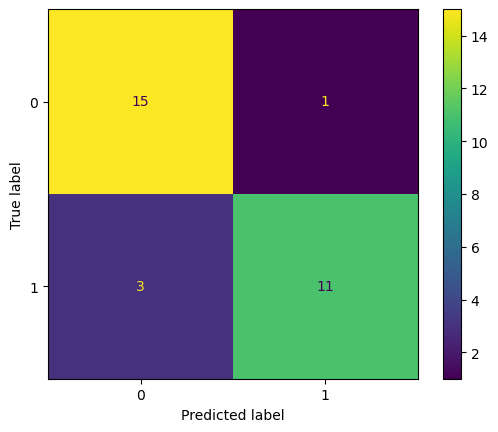

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

X = df[["tokens"]]
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# make into sparse matrices
"""
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train["tokens"].apply(lambda x: " ".join(x)))
X_test = vectorizer.transform(X_test["tokens"].apply(lambda x: " ".join(x)))

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
X_test_tfidf = tfidf_transformer.transform(X_test)
"""
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train["tokens"].apply(lambda x: " ".join(x)))
X_test_tfidf = tfidf_vectorizer.transform(X_test["tokens"].apply(lambda x: " ".join(x)))

# Naive Bayes

clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

# print multinomial probabilities 
print(clf.predict_proba(X_test_tfidf))



In [ ]:
# X_all_tfidf = tfidf_vectorizer.fit_transform(X["tokens"].apply(lambda x: " ".join(x)))

In [73]:
X = df[["tokens"]]
X_all_tfidf = tfidf_vectorizer.transform(X.apply(lambda x: " ".join(x)))

TypeError: sequence item 0: expected str instance, list found

In [71]:
df_probs = pd.DataFrame(X_all_tfidf)
# df_probs['Original_Index'] = df.index
df_probs
# df_probs = pd.DataFrame(X_train_tfidf)
# df_probs

,0
0,


In [58]:
preds = clf.predict_proba(X_train_tfidf)
preds = pd.DataFrame(preds)
preds

,0,1
0,0.285790,0.714210
1,0.561987,0.438013
2,0.651604,0.348396
3,0.293613,0.706387
4,0.245220,0.754780
...,...,...
84,0.706032,0.293968
85,0.669798,0.330202
86,0.215550,0.784450
87,0.702527,0.297473


In [48]:
joined_df = pd.concat([df_probs, preds], axis=1)
joined_df

,0,0,1
0,"(0, 5654)\t0.007378026118317202\n (0, 3260)...",0.285790,0.714210
1,"(0, 6194)\t0.010016728879902891\n (0, 5031)...",0.561987,0.438013
2,"(0, 2787)\t0.011739492812981702\n (0, 6204)...",0.651604,0.348396
3,"(0, 6312)\t0.027695082659815715\n (0, 3369)...",0.293613,0.706387
4,"(0, 6750)\t0.013847353309413953\n (0, 2800)...",0.245220,0.754780
...,...,...,...
84,"(0, 13)\t0.056053053512677316\n (0, 6494)\t...",0.706032,0.293968
85,"(0, 8333)\t0.0708769803392585\n (0, 9825)\t...",0.669798,0.330202
86,"(0, 8971)\t0.01781858907958294\n (0, 7785)\...",0.215550,0.784450
87,"(0, 3478)\t0.06433656076681565\n (0, 8065)\...",0.702527,0.297473


In [7]:

df["tfidf_score"] = tfidf_vectorizer.transform(df["tokens"].apply(lambda x: " ".join(x)))


TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

# trying tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df["tokens"], result_df['Target'], random_state=42)

In [ ]:
pipe

In [ ]:
pipe.feature_importances_